# 激活函数的定义与作用  

在神经网络中，激活函数定义了对神经元输出的映射，简单来说，神经元的输出经过激活函数处理后再作为输出。Bengio在 ICML 2016 的文章中定义了激活函数：激活函数是映射 h:R→R，且几乎处处可导。  

在神经网络中，激活函数的作用是能够给神经网络加入一些非线性因素，使得神经网络可以更好地解决较为复杂的问题。如不特别说明，激活函数一般而言是非线性函数。  

从定义来看，几乎所有的连续可导函数都可以用作激活函数。但目前常见的多是分段线性和具有指数形状的非线性函数。

## 1 Sigmoid  

Sigmoid函数曾被广泛地应用，但由于其自身的一些缺陷，现在使用较少。Sigmoid函数定义为：  

$ f(x) = \frac{1}{1 + e^{-x}} $ ，如图所示  

可见，sigmoid 在定义域内处处可导，且两侧导数逐渐趋近于0，即  

$ \lim_{x \to \infty} {f}'(x) = 0 $  

具有这类性质的激活函数定义为软饱和激活函数。与极限的定义类似，饱和也分为左饱和与右饱和：

$ \lim_{x \to +\infty} {f}'(x) = 0 $   
$ \lim_{x \to -\infty} {f}'(x) = 0 $ 

与软饱和相对的是硬饱和激活函数，即：$ {f}'(x) = 0 ，当 |x| > c $，其中 c 为常数。同理，硬饱和也分为左饱和和右饱和。常见的 ReLU 就是一类左侧硬饱和激活函数。Sigmoid 的软饱和性，使得深度神经网络在二三十年里一直难以有效的训练，是阻碍神经网络发展的重要原因。具体来说，由于在反向传递过程中，sigmoid 向下传导的梯度包含了一个$ {f}'(x) $ (sigmoid 关于输入的导数)，因此一旦输入落入饱和区，$ {f}'(x) $ 就会变得接近于0，导致了向底层传递的梯度也变得非常小。此时，网络参数很难得到有效训练。这种现象被称为梯度消失。一般来说，sigmoid 网络在 5 层之内就会产生梯度消失现象。梯度消失问题至今仍然存在，但被新的优化方法有效缓解了，例如 DBN 中的分层预训练，Batch Normalization 的逐层归一化，Xavier 和MSRA 权重初始化等代表性技术。  

Sigmoid 的饱和性虽然会导致梯度消失，但也有其有利的一面。例如它在物理意义上最为接近生物神经元。 (0, 1) 的输出还可以被表示作概率，或用于输入的归一化，代表性的如 Sigmoid 交叉熵损失函数

优点：  
1.Sigmoid函数的输出映射在(0,1)之间，单调连续，输出范围有限，优化稳定，可以用作输出层。  
2.求导容易。  
3.物理意义上最为接近生物神经元。  
4.(0,1)输出可以被表示作概率，或用于输入的归一化，如 Sigmoid 交叉熵损失函数等。  

缺点：  
1.由于其软饱和性，容易产生梯度消失，导致训练出现问题。  
2.其输出并不是以0为中心的。

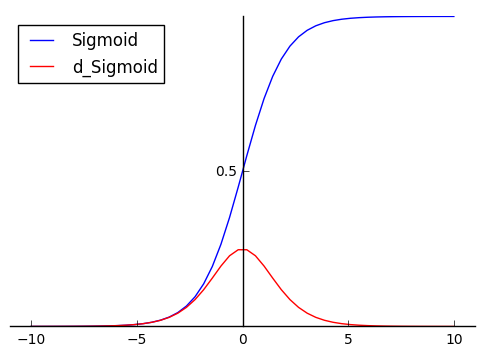

In [7]:
#!/usr/bin/python #encoding:utf-8  
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):  
    return 1.0 / (1.0 + np.exp(-x))  
 
def d_sigmoid(x):
    return x * (1 - x)

fig = plt.figure()  
ax = fig.add_subplot(111)  

x = np.linspace(-10, 10)  
y = sigmoid(x)
z = d_sigmoid(y)

plt.xlim(-11,11)  

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')    
ax.xaxis.set_ticks_position('bottom')  
ax.spines['bottom'].set_position(('data',0))  
ax.set_xticks([-10,-5,0,5,10])  
ax.yaxis.set_ticks_position('left')  
ax.spines['left'].set_position(('data',0))  
ax.set_yticks([-1,-0.5,0.5,1])  


plt.plot(x,y,label="Sigmoid",color = "blue")  
plt.plot(x,z,label="d_Sigmoid",color = "r")  
plt.legend(loc = 'upper left')  

plt.show()

梯度消失和输出非中心化：  

梯度消失  

优化神经网络的方法是Back Propagation，即导数的后向传递：先计算输出层对应的loss，然后将loss以导数的形式不断向上一层网络传递，修正相应的参数，达到降低loss的目的。 Sigmoid函数在深度网络中常常会导致导数逐渐变为0，使得参数无法被更新，神经网络无法被优化。  
原因在于两点：(1) 在上图中容易看出，当 x 较大或较小时，导数接近 0，而后向传递的数学依据是微积分求导的链式法则，当前层的导数需要之前各层导数的乘积，几个小数的相乘，结果会很接近0; (2) Sigmoid 导数的最大值是 0.25，这意味着导数在每一层至少会被压缩为原来的 1/4，通过两层后被变为1/16，…，通过10层后为1/1048576。请注意这里是“至少”，导数达到最大值这种情况还是很少见的。  

输出不是以0为中心  

Sigmoid 函数的输出值恒大于0，这会导致模型训练的收敛速度变慢。举例来讲，如果所有 x 均为正数或负数，那么其对 w 的导数总是正数或负数，这样会导致训练的权重都朝着一个方向跟新产生参数，若最优的路径是有些参数需要减少，有些参数需要增加，就会到导致训练的参数不是最优的结果。深度学习往往需要大量时间来处理大量数据，模型的收敛速度是尤为重要的。所以，总体上来讲，训练深度学习网络尽量使用 zero-centered 数据 (可以经过数据预处理实现) 和 zero-centered 输出。

## 2 tanh  

比起 Sigmoid 函数通常更倾向于 tanh 函数。tanh 函数被定义为  

$ f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}} $ ，如图所示  

可见，$tanh(x) = 2sigmoid(2x) - 1$，也具有软饱和性。  

优点：  
1.比 Sigmoid 函数收敛速度更快。  
2.相比 Sigmoid 函数，它解决了zero-centered的输出问题,输出以0为中心。  

缺点：  
没有改变 Sigmoid 函数由于饱和性产生的梯度消失问题。

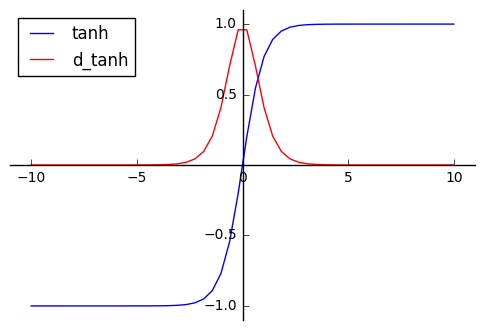

In [13]:
def  tanh(x):  
    return (1.0 - np.exp(-2*x)) / (1.0 + np.exp(-2*x))  

def d_tanh(x):
    return 1 - x*x

fig = plt.figure()  
ax = fig.add_subplot(111)  

x = np.linspace(-10, 10)  
y = tanh(x)  
z = d_tanh(y)

plt.xlim(-11,11)  
plt.ylim(-1.1,1.1)  
  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')  
  
ax.xaxis.set_ticks_position('bottom')  
ax.spines['bottom'].set_position(('data',0))  
ax.set_xticks([-10,-5,0,5,10])  
ax.yaxis.set_ticks_position('left')  
ax.spines['left'].set_position(('data',0))  
ax.set_yticks([-1,-0.5,0.5,1])  

plt.plot(x,y,label="tanh",color = "blue")
plt.plot(x,z,label="d_tanh",color = "r")
plt.legend(loc = 'upper left')  

plt.show()

## 3 ReLU  

ReLU 是最近几年非常受欢迎的激活函数。被定义为  

$ f(x)= \begin{cases}
0 & x<0 \\
x & x>=0 \\
\end{cases}$  

如图所示  

虽然2006年 Hinton 教授提出通过分层无监督预训练解决深层网络训练困难的问题，但是深度网络的直接监督式训练的最终突破，最主要的原因是采用了新型激活函数ReLU。与传统的 sigmoid 激活函数相比，ReLU 能够有效缓解梯度消失问题，从而直接以监督的方式训练深度神经网络，无需依赖无监督的逐层预训练，这也是 2012 年深度卷积神经网络在 ILSVRC 竞赛中取得里程碑式突破的重要原因之一。  

可见，ReLU 在 $x<0$ 时硬饱和。由于$x>0$时导数为 1，所以，ReLU 能够在 x>0 时保持梯度不衰减，从而缓解梯度消失问题。但随着训练的推进，部分输入会落入硬饱和区，导致对应权重无法更新。这种现象被称为“神经元死亡”。  

ReLU 还经常被“诟病”的一个问题是输出具有偏移现象，即输出均值恒大于零。偏移现象和神经元死亡会共同影响网络的收敛性。有实验表明，如果不采用 Batch Normalization，即使用 MSRA 初始化 30 层以上的 ReLU 网络，最终也难以收敛。相对的，PReLU 和 ELU 网络都能顺利收敛，这两种改进的激活函数将在后面介绍。  

ReLU另外一个性质是提供神经网络的稀疏表达能力，在 Bengio 教授的 Deep Sparse Rectifier Neural Network 一文中被认为是 ReLU 带来网络性能提升的原因之一。但后来的研究发现稀疏性并非性能提升的必要条件，文献 RReLU 也指明了这一点。PReLU、ELU等激活函数不具备这种稀疏性，但都能够提升网络性能。  

优点：  
1.相比起 Sigmoid 和 tanh，ReLU 在 SGD 中能够快速收敛。    
2.Sigmoid 和 tanh 涉及了很多很 expensive 的操作（比如指数），ReLU可以更加简单的实现。  
3.有效缓解了梯度消失的问题。  
4.在没有无监督预训练的时候也能有较好的表现。    
5.提供了神经网络的稀疏表达能力。  

缺点：  
1.ReLU的输出不是zero-centered  
2.Dead ReLU Problem，指的是某些神经元可能永远不会被激活，导致相应的参数永远不能被更新。有两个主要原因可能导致这种情况产生: (1) 非常不幸的参数初始化，这种情况比较少见 (2) learning rate 太高导致在训练过程中参数更新太大，不幸使网络进入这种状态。解决方法是可以采用Xavier初始化方法，以及避免将learning rate设置太大或使用adagrad等自动调节learning rate的算法。  
使用ReLU时候，随着训练的进行，可能会出现神经元死亡，权重无法更新的情况。如果发生这种情况，那么流经神经元的梯度从这一点开始将永远是0。也就是说，ReLU 神经元在训练中不可逆地死亡了。

尽管存在这两个问题，ReLU 目前仍是最常用的 activation function!

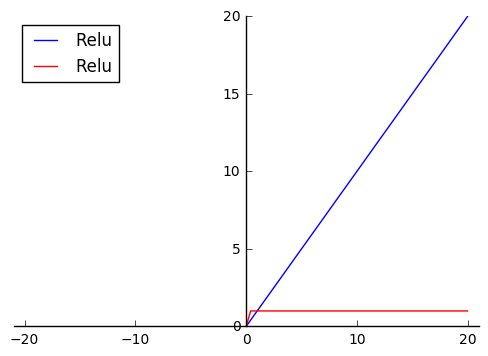

In [29]:
def  ReLU(x):  
    return np.maximum(x,0,x)

def d_ReLU(x):  
    return 1. * (x > 0)

fig = plt.figure()  
ax = fig.add_subplot(111)  

x = np.linspace(-20, 20)  
y = ReLU(x)
z = d_ReLU(y)

plt.xlim(-21,21)  
# plt.ylim(-1.1,1.1)  
  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')  
  
ax.xaxis.set_ticks_position('bottom')  
ax.spines['bottom'].set_position(('data',0))  
# # ax.set_xticks([-10,-5,0,5,10])  
ax.yaxis.set_ticks_position('left')  
ax.spines['left'].set_position(('data',0))  
# ax.set_yticks([-1,-0.5,0.5,1])  

plt.plot(x,y,label="Relu",color = "blue")  
plt.plot(x,z,label="Relu",color = "r")  
plt.legend(loc = 'upper left')  

plt.show()

## 4 LReLU、PReLU  

通常在 LReLU 和 PReLU 中，用的是同一个激活函数，如图所示  

$ f(x)= \begin{cases}
ax & x<0 \\
x & x>=0 \\
\end{cases}$  

* LReLU  
当 a 比较小而且固定的时候，我们称之为 LReLU。LReLU 最初的目的是为了避免梯度消失。但在一些实验中，我们发现 LReLU 对准确率并没有太大的影响。很多时候，想要应用 LReLU 时，我们必须要非常小心谨慎地重复训练，选取出合适的 a，LReLU 的表现出的结果才比 ReLU 好。因此有人提出了一种自适应地从数据中学习参数的PReLU。  

* PReLU  
与 LReLU 相比，PReLU 中的负半轴斜率 a 可学习而非固定。原文献建议初始化 a 为0.25。虽然 PReLU 引入了额外的参数，但基本不需要担心过拟合。与ReLU 相比，PReLU 收敛速度更快。因为 PReLU 的输出更接近 0 均值，使得 SGD 更接近 natural gradient。


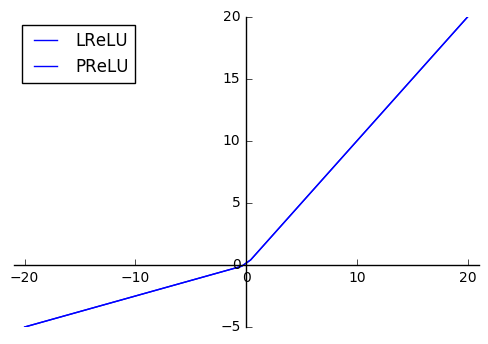

In [88]:
def  LReLU(x):  
    return np.maximum(x,0) + 0.25 * np.minimum(x,0)
#     return 0.25 * np.minimum(x,0,x)
  
fig = plt.figure()  
ax = fig.add_subplot(111)  

x = np.linspace(-20, 20)  
y = LReLU(x)  

plt.xlim(-21,21)  
# plt.ylim(-1.1,1.1)  
  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')  
  
ax.xaxis.set_ticks_position('bottom')  
ax.spines['bottom'].set_position(('data',0))  
# # ax.set_xticks([-10,-5,0,5,10])  
ax.yaxis.set_ticks_position('left')  
ax.spines['left'].set_position(('data',0))  
# ax.set_yticks([-1,-0.5,0.5,1])  

plt.plot(x,y,label="LReLU",color = "blue")
plt.plot(x,y,label="PReLU",color = "blue")  
plt.legend(loc = 'upper left')  

plt.show()

## 5 RReLU  

RReLU 的激活函数是  

$ f(x)= \begin{cases}
ax & x<0 \\
x & x>=0 \\
\end{cases}$  
$ a∼U(l,u), l<u,且l,u∈[0,1)$  

数学形式与 PReLU 类似，但 RReLU 是一种非确定性激活函数，其参数是一个保持在给定范围内取样的随机变量。这种随机性类似于一种噪声，能够在一定程度上起到正则效果。

## 6 ELU  

ELU融合了 sigmoid 和 ReLU，具有左侧软饱性,如图所示  

$ f(x)= \begin{cases}
a(e^x−1) & x<0 \\
x & x>=0 \\
\end{cases}$   

右侧线性部分使得ELU能够缓解梯度消失，而左侧软饱能够让ELU对输入变化或噪声更鲁棒。ELU的输出均值接近于零，所以收敛速度更快。经本文作者实验，ELU的收敛性质的确优于ReLU和PReLU。在cifar10上，ELU 网络的loss 降低速度更快；在 ImageNet上，不加 Batch Normalization 30 层以上的 ReLU 网络会无法收敛，PReLU网络在MSRA的Fan-in （caffe ）初始化下会发散，而 ELU 网络在Fan-in/Fan-out下都能收敛 。实验代码见GitHub - Coldmooon/Code-for-MPELU: Code for Improving Deep Neural Network with Multiple Parametric Exponential Linear Units。

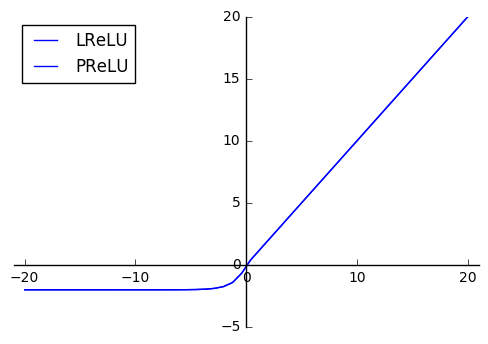

In [97]:
def  ELU(x):  
    return np.maximum(x,0) + (x < 0) * 2 * (np.exp(x) - 1)
  
fig = plt.figure()  
ax = fig.add_subplot(111)  

x = np.linspace(-20, 20)  
y = ELU(x)  

plt.xlim(-21,21)  
# plt.ylim(-1.1,1.1)  
  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')  
  
ax.xaxis.set_ticks_position('bottom')  
ax.spines['bottom'].set_position(('data',0))  
# # ax.set_xticks([-10,-5,0,5,10])  
ax.yaxis.set_ticks_position('left')  
ax.spines['left'].set_position(('data',0))  
# ax.set_yticks([-1,-0.5,0.5,1])  

plt.plot(x,y,label="LReLU",color = "blue")
plt.plot(x,y,label="PReLU",color = "blue")  
plt.legend(loc = 'upper left')  

plt.show()

## 7 Maxout  

Maxout是深度学习网络中的一层网络，就像池化层、卷积层一样等，可以把 maxout 看成是网络的激活函数层，假设网络某一层的输入特征向量为：$X = (x_1,x_2,……,x_d)$，也就是我们输入是d个神经元。Maxout隐藏层每个神经元的计算公式如下：  

$ f(x) = max(x^T*W_{ij} + b_{ij}) $  

可以这么理解，本来传统的MLP算法在第 i 层到第 i+1 层，参数只有一组，然而现在我们不这么做，我们在这一层同时训练 n 组参数，然后选择激活值最大的作为下一层神经元的激活值。

'''  
output = K.max(K.dot(X, W) + b, axis=1)#maxout激活函数   
'''  

Maxout可以看成是一个激活函数 ，然而它与原来我们以前所学的激活函数又有所不同。  
maxout激活函数，它具有如下性质：  
1、maxout激活函数并不是一个固定的函数，不像 Sigmod、Relu、Tanh 等函数，是一个固定的函数方程  
2、它是一个可学习的激活函数，因为我们 W 参数是学习变化的。  
3、它是一个分段线性函数,然而任何一个凸函数，都可以由线性分段函数进行逼近近似。    

maxout 的拟合能力是非常强的，它可以拟合任意的的凸函数。最直观的解释就是任意的凸函数都可以由分段线性函数以任意精度拟合，而 maxout 又是取 k 个隐隐含层节点的最大值，这些”隐隐含层"节点也是线性的，所以在不同的取值范围下，最大值也可以看做是分段线性的.

## 总结

深度学习的快速发展，催生了形式各异的激活函数。面对琳琅满目的成果，如何做出选择目前尚未有统一定论，仍需依靠实验指导。一般来说，在分类问题上建议首先尝试 ReLU，其次 ELU，这是两类不引入额外参数的激活函数。并使用正则化技术，例如应该考虑在网络中增加 Batch Normalization 层。

## 参考文献  

* [The Activation Function in Deep Learning 浅谈深度学习中的激活函数](http://www.cnblogs.com/rgvb178/p/6055213.html)  
* [深度学习中的激活函数导引](https://zhuanlan.zhihu.com/p/22142013?refer=dlclass)